## 6.3.1 Geographical Visualizations with Python

## Contents List: 

1. Import Data and Libraries
2. Data Wrangling
3. Data Cleaning
4. Plotting a Choropleth

## 1. Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# define path
path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/Section 6/Final Project 6'

In [4]:
# Import ".json" file for cities and states in India
india_cities_geo = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/Section 6/Final Project 6/02 Data/INDIA_STATES.geojson'

In [5]:
# import original data set "dairy_wrangled.csv"
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'dairy_wrangled.csv'))

In [6]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/Section 6/Final Project 6/02 Data/INDIA_STATES.geojson',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 1, 'geometry': {'type': 'Polygon', 'coordinates': [[[96.09427767204961, 29.454768639867538], [96.08208335468142, 29.461725849496894], [96.05707720544227, 29.45680797691796], [96.0039194685731, 29.410421097536634], [95.98860737822977, 29.405224127607845], [95.9584846191684, 29.381013741328612], [95.88233422861603, 29.38996516106192], [95.8496938403596, 29.357084930741557], [95.84172601106323, 29.35217650742975], [95.82824279990851, 29.354159446369096], [95.79790580971988, 29.334780883745516], [95.79245676754695, 29.336354493890962], [95.78459141715989, 29.354899844192683], [95.77912820496168, 29.354925408210914], [95.74687638747298, 29.327616138277815], [95.74492614409286, 29.31471706187219], [95.72845228055886, 29.300922575357003], [95.71658120038607, 29.29676141868963], [95.70332594302292, 29.298905915213584], [95.68452534408837, 29.275732727824092], [95.64425023441935, 29.25447998266981], [95.63937350711736, 29.24828821407877], [95.63258206660127, 29.2475040

In [7]:
df.head()

Unnamed: 0       Location  Total Land Area (acres)  Number of Cows  \
0           0      Telangana                   310.84              96   
1           1  Uttar Pradesh                    19.19              44   
2           2     Tamil Nadu                   581.69              24   
3           3      Telangana                   908.00              89   
4           4    Maharashtra                   861.95              21   

  Farm Size      Date Product Name                 Brand  \
0    Medium   2/17/22    Ice Cream           Dodla Dairy   
1     Large   12/1/21         Milk                  Amul   
2    Medium   2/28/22       Yogurt           Dodla Dairy   
3     Small    6/9/19       Cheese  Britannia Industries   
4    Medium  12/14/20   Buttermilk          Mother Dairy   

   Quantity (liters/kg)  Price per Unit  ...  Production Date  \
0                222.40           85.72  ...         12/27/21   
1                687.48           42.61  ...          10/3/21   
2                503.48           36.50  ...          1/14/22   
3                823.36           26.52  ...          5/15/19   
4                147.77           83.85  ...         10/17/20   

   Expiration Date Quantity Sold (liters/kg) Price per Unit (sold)  \
0          1/21/22                         7                 82.24   
1         10/25/21                       558                 39.24   
2          2/13/22                       256                 33.81   
3          7/26/19                       601                 28.92   
4         10/28/20                       145                 83.07   

  Approx. Total Revenue(INR)  Customer Location  Sales Channel  \
0                     575.68     Madhya Pradesh      Wholesale   
1                   21895.92             Kerala      Wholesale   
2                    8655.36     Madhya Pradesh         Online   
3                   17380.92          Rajasthan         Online   
4                   12045.15          Jharkhand         Retail   

   Quantity in Stock (liters/kg) Minimum Stock Threshold (liters/kg)  \
0                            215                               19.55   
1                            129                               43.17   
2                            247                               15.10   
3                            222                               74.50   
4                              2                               76.02   

  Reorder Quantity (liters/kg)  
0                        64.03  
1                       181.10  
2                       140.83  
3                        57.68  
4                        33.40  

[5 rows x 23 columns]

In [8]:
df.shape

(4325, 23)

In [9]:
df.columns

Index(['Unnamed: 0', 'Location', 'Total Land Area (acres)', 'Number of Cows',
       'Farm Size', 'Date', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

## 2. Data Wrangling

In [10]:
# Select only the necessary columns and put them in a list called columns

columns = ["Location", "Farm Size", "Product Name", "Brand", "Quantity (liters/kg)", "Price per Unit", "Total Value", "Quantity Sold (liters/kg)", "Approx. Total Revenue(INR)"] 

In [11]:
# Create a subset

cities_subset = df[columns]

In [12]:
cities_subset.head()

Location Farm Size Product Name                 Brand  \
0      Telangana    Medium    Ice Cream           Dodla Dairy   
1  Uttar Pradesh     Large         Milk                  Amul   
2     Tamil Nadu    Medium       Yogurt           Dodla Dairy   
3      Telangana     Small       Cheese  Britannia Industries   
4    Maharashtra    Medium   Buttermilk          Mother Dairy   

   Quantity (liters/kg)  Price per Unit  Total Value  \
0                222.40           85.72   19064.1280   
1                687.48           42.61   29293.5228   
2                503.48           36.50   18377.0200   
3                823.36           26.52   21835.5072   
4                147.77           83.85   12390.5145   

   Quantity Sold (liters/kg)  Approx. Total Revenue(INR)  
0                          7                      575.68  
1                        558                    21895.92  
2                        256                     8655.36  
3                        601                    17380.92  
4                        145                    12045.15

In [13]:
cities_subset.shape

(4325, 9)

## 3. Data Cleaning

In [14]:
# Check for missing values

cities_subset.isnull().sum()

Location                      0
Farm Size                     0
Product Name                  0
Brand                         0
Quantity (liters/kg)          0
Price per Unit                0
Total Value                   0
Quantity Sold (liters/kg)     0
Approx. Total Revenue(INR)    0
dtype: int64

In [15]:
# Check for duplicates

dups = cities_subset.duplicated()

In [16]:
dups.shape #no dupes

(4325,)

#### Extreme Values Check

<Axes: xlabel='Farm Size', ylabel='Count'>

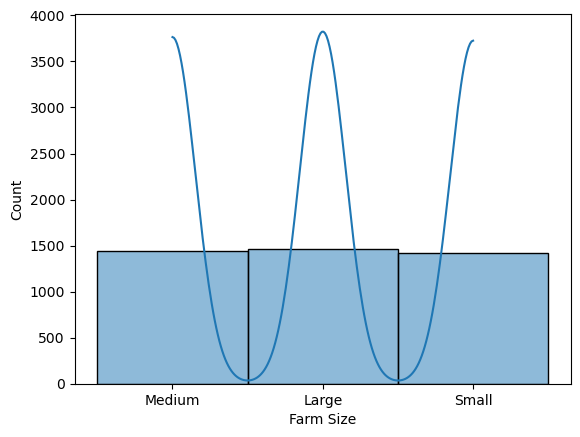

In [17]:
sns.histplot(cities_subset['Farm Size'], bins=20, kde = True) # shows extreme values for 'fat'

No extreme values for farm size

<Axes: xlabel='Product Name', ylabel='Count'>

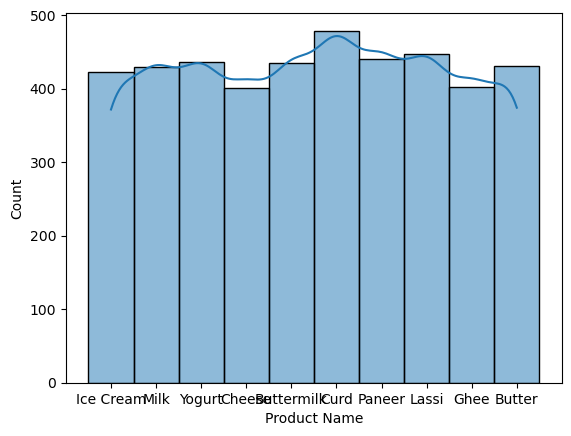

In [18]:
sns.histplot(cities_subset['Product Name'], bins=10, kde = True) # shows extreme values for 'fat'

No extreme values for products

<Axes: xlabel='Brand', ylabel='Count'>

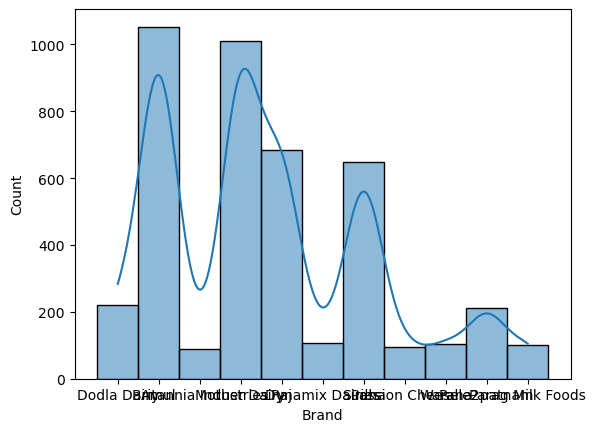

In [19]:
sns.histplot(cities_subset['Brand'], bins=11, kde = True) # shows extreme values for 'fat'

There aren't necessarily extreme values, but a large variety regarding how many counts of each brand

<Axes: xlabel='Quantity (liters/kg)', ylabel='Count'>

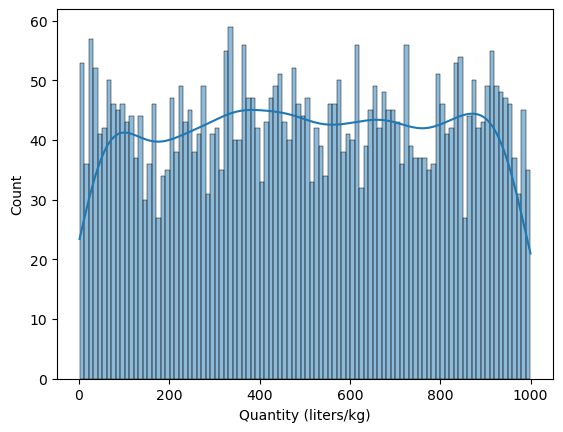

In [20]:
sns.histplot(cities_subset['Quantity (liters/kg)'], bins=100, kde = True) # shows extreme values for 'fat'

No extreme values for Quantity (liters/kg)

<Axes: xlabel='Price per Unit', ylabel='Count'>

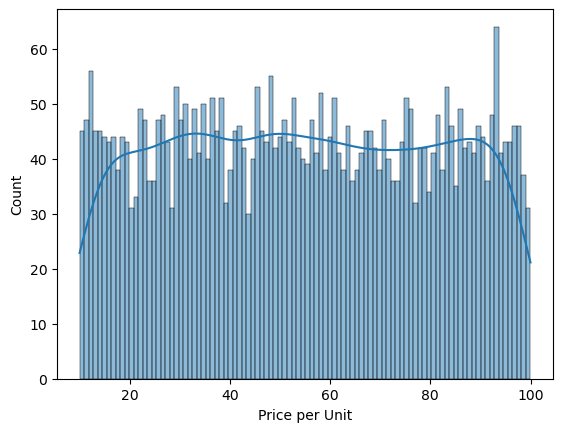

In [21]:
sns.histplot(cities_subset['Price per Unit'], bins=100, kde = True) # shows extreme values for 'fat'

No extreme values for Price per Unit

<Axes: xlabel='Total Value', ylabel='Count'>

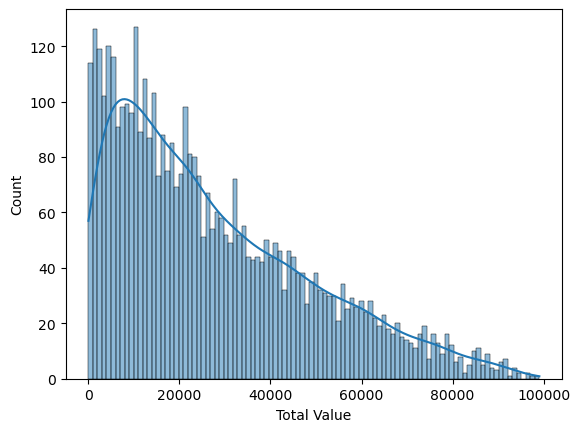

In [22]:
sns.histplot(cities_subset['Total Value'], bins=100, kde = True) # shows extreme values for 'fat'

No extreme values for Total Value; it's reasonabele to assume a range of 0 - 100,000 based on the wide range of produce for different brands

<Axes: xlabel='Quantity Sold (liters/kg)', ylabel='Count'>

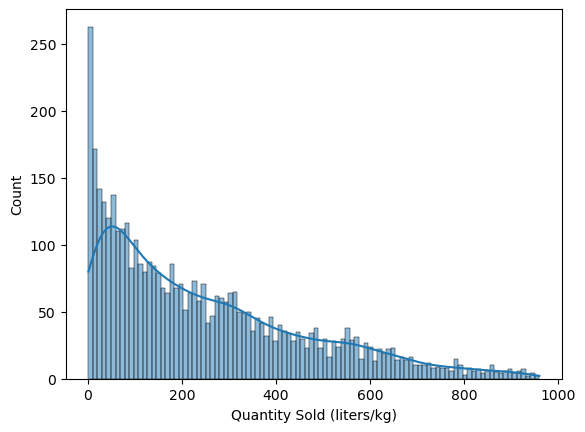

In [23]:
sns.histplot(cities_subset['Quantity Sold (liters/kg)'], bins=100, kde = True)

"0" quantity's sold has the highest count by a lot. Should 0 be removed as an extreme value, or is it an important metric?

Initial data distribution:
count    4325.000000
mean      248.095029
std       217.024182
min         1.000000
25%        69.000000
50%       189.000000
75%       374.000000
max       960.000000
Name: Quantity Sold (liters/kg), dtype: float64
Zero values found: 41
Filtered data distribution:
count    4284.000000
mean      250.459851
std       216.703254
min         2.000000
25%        72.000000
50%       192.000000
75%       376.000000
max       960.000000
Name: Quantity Sold (liters/kg), dtype: float64


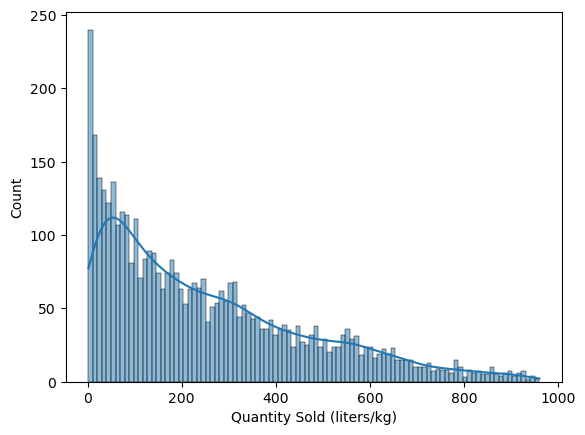

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verify initial data distribution
print("Initial data distribution:")
print(cities_subset['Quantity Sold (liters/kg)'].describe())

# Verify if there are any zero values
zero_values = cities_subset[cities_subset['Quantity Sold (liters/kg)'] == 1]
print(f"Zero values found: {len(zero_values)}")

# Clean extreme values: Remove values less than or equal to 0
cities_subset_1 = cities_subset[cities_subset['Quantity Sold (liters/kg)'] > 1]

# Verify filtered data
print("Filtered data distribution:")
print(cities_subset_1['Quantity Sold (liters/kg)'].describe())

# Plot the histogram
sns.histplot(cities_subset_1['Quantity Sold (liters/kg)'], bins=100, kde=True)

# Display the plot
plt.show()

I removed values less than 1, and the distribution looks better. However, I think values with 0 is an important piece of data, because it indicates that a product didn't sell and is therefore in stock. It also affects total value vs ATR.

Initial data distribution:
count    4325.000000
mean      248.095029
std       217.024182
min         1.000000
25%        69.000000
50%       189.000000
75%       374.000000
max       960.000000
Name: Quantity Sold (liters/kg), dtype: float64
Zero values found: 20
Filtered data distribution:
count    4062.000000
mean      263.830871
std       214.653590
min        11.000000
25%        85.000000
50%       208.000000
75%       389.750000
max       960.000000
Name: Quantity Sold (liters/kg), dtype: float64


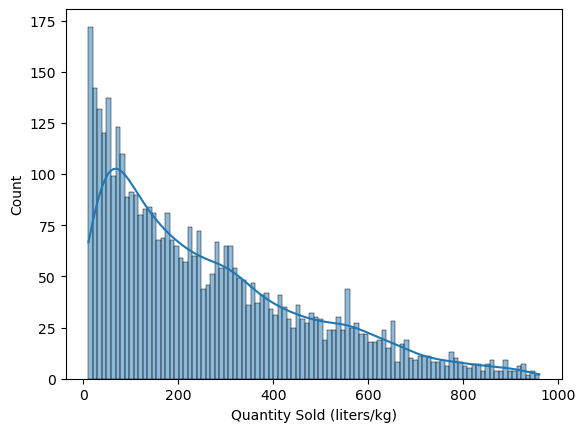

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verify initial data distribution
print("Initial data distribution:")
print(cities_subset['Quantity Sold (liters/kg)'].describe())

# Verify if there are any zero values
zero_values = cities_subset[cities_subset['Quantity Sold (liters/kg)'] == 10]
print(f"Zero values found: {len(zero_values)}")

# Clean extreme values: Remove values less than or equal to 0
cities_subset_1 = cities_subset[cities_subset['Quantity Sold (liters/kg)'] > 10]

# Verify filtered data
print("Filtered data distribution:")
print(cities_subset_1['Quantity Sold (liters/kg)'].describe())

# Plot the histogram
sns.histplot(cities_subset_1['Quantity Sold (liters/kg)'], bins=100, kde=True)

# Display the plot
plt.show()

This is an experiment to see how the data would look if I removed data with less than 10 quantities sold. I don't think this would paint an accurate picture of the data, though.

<Axes: xlabel='Approx. Total Revenue(INR)', ylabel='Count'>

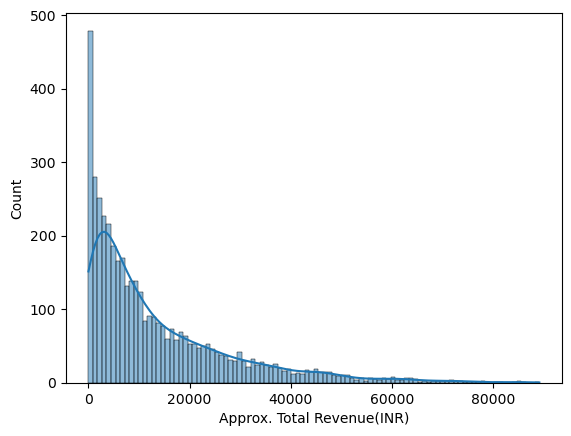

In [26]:
sns.histplot(cities_subset['Approx. Total Revenue(INR)'], bins=100, kde = True) 

Once again, "$0" approx.total revenue has the highest count by a lot. Should 0 be removed as an extreme value, or is it an important metric?

Initial data distribution:
count     4325.000000
mean     13580.265401
std      14617.009122
min         12.540000
25%       2916.650000
50%       8394.540000
75%      19504.550000
max      89108.900000
Name: Approx. Total Revenue(INR), dtype: float64
Zero values found: 0
Filtered data distribution:
count     4253.000000
mean     13809.232173
std      14633.007712
min        101.840000
25%       3160.800000
50%       8622.360000
75%      19761.100000
max      89108.900000
Name: Approx. Total Revenue(INR), dtype: float64


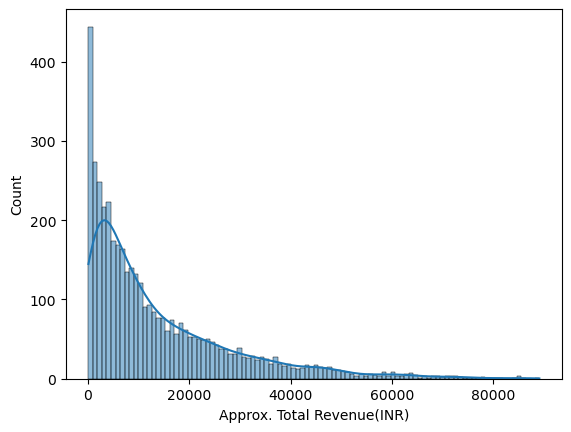

In [27]:
# Verify initial data distribution
print("Initial data distribution:")
print(cities_subset['Approx. Total Revenue(INR)'].describe())

# Verify if there are any zero values
zero_values = cities_subset[cities_subset['Approx. Total Revenue(INR)'] == 100]
print(f"Zero values found: {len(zero_values)}")

# Clean extreme values: Remove values less than or equal to 0
cities_subset_2 = cities_subset[cities_subset['Approx. Total Revenue(INR)'] > 100]

# Verify filtered data
print("Filtered data distribution:")
print(cities_subset_2['Approx. Total Revenue(INR)'].describe())

# Plot the histogram
sns.histplot(cities_subset_2['Approx. Total Revenue(INR)'], bins=100, kde=True)

# Display the plot
plt.show()

The large distribution only began to lessen when I removed ATR values less than 100. Like above, I don't think this would paint an accurate picture of the data.

In [28]:
cities_subset.dtypes

Location                       object
Farm Size                      object
Product Name                   object
Brand                          object
Quantity (liters/kg)          float64
Price per Unit                float64
Total Value                   float64
Quantity Sold (liters/kg)       int64
Approx. Total Revenue(INR)    float64
dtype: object

## 4. Plotting a Choropleth

In [29]:
# Create a data frame with just the cities and the values for total value we want plotted

cities_tv_map = cities_subset[['Location','Total Value']]
cities_tv_map.head()

Location  Total Value
0      Telangana   19064.1280
1  Uttar Pradesh   29293.5228
2     Tamil Nadu   18377.0200
3      Telangana   21835.5072
4    Maharashtra   12390.5145

In [30]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = india_cities_geo, 
    data = cities_tv_map,
    columns = ['Location', 'Total Value'],
    key_on = 'feature.properties.STNAME_SH', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [32]:
map.save('plot_data.html')